In [1]:
import os
import numpy as np
import pandas as pd
import nitools as nt
import nibabel as nb
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from IPython.display import Image

from pathlib import Path
from SUITPy import flatmap

import selective_recruitment.plotting as plotting
import selective_recruitment.recruite_ana as ra
import selective_recruitment.globals as gl
import selective_recruitment.scripts.script_prep_sc as ss
import selective_recruitment.scripts.script_roi_pairs_IBC as rp


from statsmodels.stats.anova import AnovaRM # perform F test
import warnings

In [6]:
# setting working directory 
# wkdir = '/Volumes/diedrichsen_data$/data/Cerebellum/Demand/selective_recruit'
langdir = 'A:\data\Cerebellum\Language'
if not Path(langdir).exists():
    langdir = '/cifs/diedrichsen/data/Cerebellum/Language/'

In [7]:
label_dict={'rest':'rest',
            'consonant_string': 'consonant', 
            'pseudoword_list':'pseudoword',
            'jabberwocky':'jabber',
            'word_list':'word',
            'simple_sentence':'simple_sen',
            'complex_sentence': 'complex_sen',
            'probe':'probe'}

In [9]:
# dataframe cleanup function (averages across halves and removes probe)
def df_clean(dataframe):
    dataframe_noprob = dataframe[dataframe['cond_name'] != 'probe']
    dataframe_avaraged = dataframe_noprob.groupby(['sn', 'cond_name']).mean()
    dataframe_final = dataframe_avaraged.reset_index()

    return dataframe_final

# Sanity checks for code correctness

In [12]:
# D = ra.get_summary(dataset = "IBC", 
#                 ses_id = 'ses-lyon2', 
#                 type = "CondHalf", 
#                 cerebellum_roi = None, 
#                 cortex_roi = None,
#                 add_rest = True)
# D = ra.run_regress(D,fit_intercept=True)
# D.to_csv(langdir + '/IBC/ROI_all_lyon2.tsv',sep='\t')

In [7]:
df_path = os.path.join(langdir, 'IBC', "ROI_all_lyon2.tsv")
df = pd.read_csv(df_path, sep="\t")
dataframe_avaraged = df.groupby(['sn', 'cond_name']).mean()
dataframe_final = dataframe_avaraged.reset_index()
condition_df = df[df['cond_name'] == 'word']
print(condition_df['Y'].mean())

0.015166450778683655


/tmp/ipykernel_28894/2340655372.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataframe_avaraged = df.groupby(['sn', 'cond_name']).mean()


In [17]:
# D = ra.get_summary(dataset = "MDTB", 
#                 ses_id = 'ses-s2', 
#                 type = "CondAll", 
#                 cerebellum_roi = None, 
#                 cortex_roi = None,
#                 add_rest = True)
# D = ra.run_regress(D,fit_intercept=True)
# D.to_csv(langdir + '/IBC/ROI_all_MDTB-S2.tsv',sep='\t')

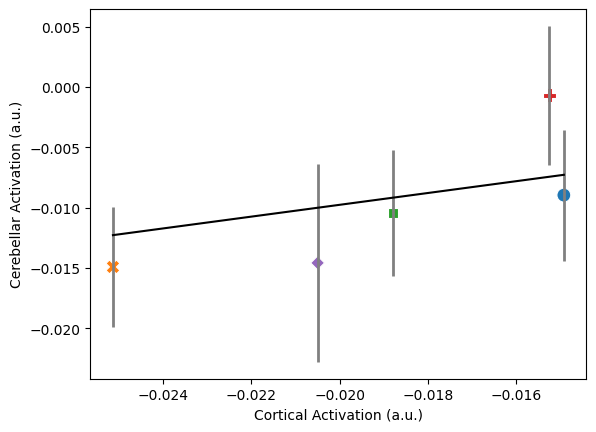

In [3]:
df_path = os.path.join(langdir, 'IBC', "ROI_all_MDTB-S2.tsv")
df = pd.read_csv(df_path, sep="\t")
conditions = ['Prediction','PredictViol','PredictScram','VerbGen','WordRead']
df_filtered = df[df['cond_name'].isin(conditions)]
plotting.make_scatterplot(df_filtered,split='cond_name', markers= True)

# Across whole

In [1]:
# D = ra.get_summary(dataset = "IBC", 
#                 ses_id = 'ses-rsvplanguage', 
#                 type = "CondHalf", 
#                 cerebellum_roi = None, 
#                 cortex_roi = None,
#                 add_rest = True)
# D = ra.run_regress(D,fit_intercept=True)
# D.to_csv(langdir + '/IBC/whole/ROI_all.tsv',sep='\t')

/tmp/ipykernel_55400/2346101002.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataframe_avaraged = dataframe_noprob.groupby(['sn', 'cond_name']).mean()


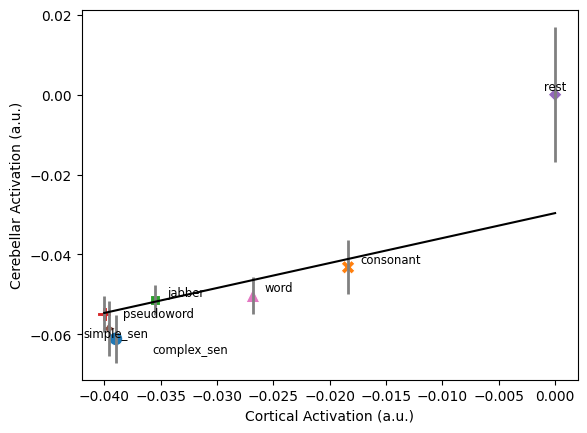

In [10]:
df_path = os.path.join(langdir, 'IBC/whole', "ROI_all.tsv")
df = pd.read_csv(df_path, sep="\t")
df1= df_clean(dataframe= df)

plotting.make_scatterplot(df1,split='cond_name', markers= True, labels= label_dict)

In [11]:
# need to pass 
print(AnovaRM(data=df1[df1.cond_name!='rest'], depvar='res',
              subject='sn', within=['cond_name'], aggregate_func = np.mean).fit())

                 Anova
          F Value Num DF  Den DF Pr > F
---------------------------------------
cond_name  2.1917 5.0000 55.0000 0.0682



# Language ROI (Nettekoven S1-S4). Connectivity weights trained on MDTB and applied to cereballar probabilistic parcellation

In [10]:
# D = ra.get_summary(dataset = "IBC", 
#                 ses_id = 'ses-rsvplanguage', 
#                 type = "CondHalf", 
#                 cerebellum_roi = 'tpl-SUIT/atl-language(S1-S4)_NettekovenSym68c32_space-SUIT', 
#                 cortex_roi = 'tpl-fs32k/language(S1-S4)_NettekovenSym68c32.32k',
#                 add_rest = True)
# D = ra.run_regress(D,fit_intercept=True)
# D.to_csv(langdir + '/IBC/ROI/ROI_nettekoven(S1-S4).tsv',sep='\t')

/tmp/ipykernel_55400/2346101002.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataframe_avaraged = dataframe_noprob.groupby(['sn', 'cond_name']).mean()


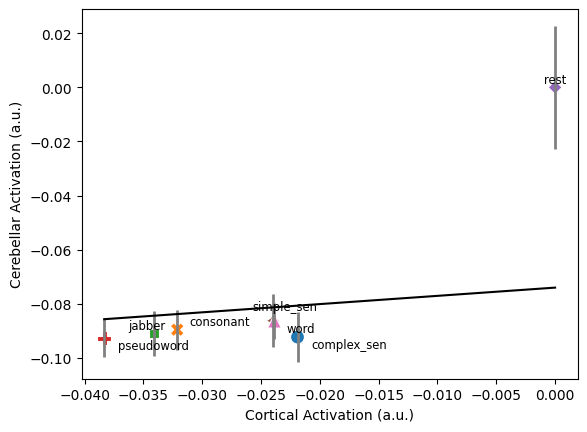

In [12]:
df_path = os.path.join(langdir, 'IBC/roi', "ROI_nettekoven(S1-S4).tsv")
df = pd.read_csv(df_path, sep="\t")
df1= df_clean(dataframe= df)

plotting.make_scatterplot(df1,split='cond_name', markers= True, labels= label_dict)

In [13]:
# need to pass 
print(AnovaRM(data=df1[df1.cond_name!='rest'], depvar='res',
              subject='sn', within=['cond_name'], aggregate_func = np.mean).fit())

                 Anova
          F Value Num DF  Den DF Pr > F
---------------------------------------
cond_name  1.1092 5.0000 55.0000 0.3662



# MD ROI (Nettekoven D1-D4). Connectivity weights trained on MDTB and applied to cereballar probabilistic parcellation

In [13]:
# D = ra.get_summary(dataset = "IBC", 
#                 ses_id = 'ses-rsvplanguage', 
#                 type = "CondHalf", 
#                 cerebellum_roi = 'tpl-SUIT/atl-md(D1-D4)_NettekovenSym68c32_space-SUIT', 
#                 cortex_roi = 'tpl-fs32k/md(D1-D4)_NettekovenSym68c32.32k',
#                 add_rest = True)
# D = ra.run_regress(D,fit_intercept=True)
# D.to_csv(langdir + '/IBC/ROI/ROI_nettekoven(D1-D4).tsv',sep='\t')

/tmp/ipykernel_55400/2346101002.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataframe_avaraged = dataframe_noprob.groupby(['sn', 'cond_name']).mean()


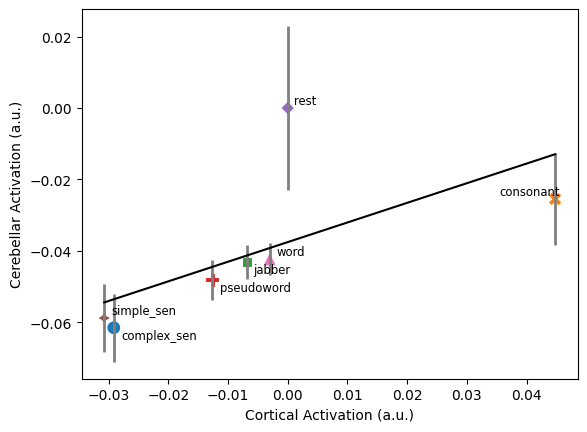

In [14]:
df_path = os.path.join(langdir, 'IBC/roi', "ROI_nettekoven(D1-D4).tsv")
df = pd.read_csv(df_path, sep="\t")
df1= df_clean(dataframe= df)

plotting.make_scatterplot(df1,split='cond_name', markers= True, labels= label_dict)

In [15]:
# need to pass 
print(AnovaRM(data=df1[df1.cond_name!='rest'], depvar='res',
              subject='sn', within=['cond_name'], aggregate_func = np.mean).fit())

                 Anova
          F Value Num DF  Den DF Pr > F
---------------------------------------
cond_name  0.6082 5.0000 55.0000 0.6939



# Connectivity model MDTB trained (across whole) 

In [16]:
# D = ss.get_summary_conn(dataset = "IBC", 
#                     ses_id = 'ses-rsvplanguage', 
#                     type = "CondHalf", 
#                     cerebellum_roi ='MDTB10', 
#                     cortex_roi = "Icosahedron-1002_Sym.32k",
#                     add_rest = True)
# D = ra.run_regress(D,fit_intercept=True)
# D.to_csv(langdir + '/IBC/connectivity/ROI_MDTB10_conn.tsv',sep='\t')

/tmp/ipykernel_55400/2346101002.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataframe_avaraged = dataframe_noprob.groupby(['sn', 'cond_name']).mean()


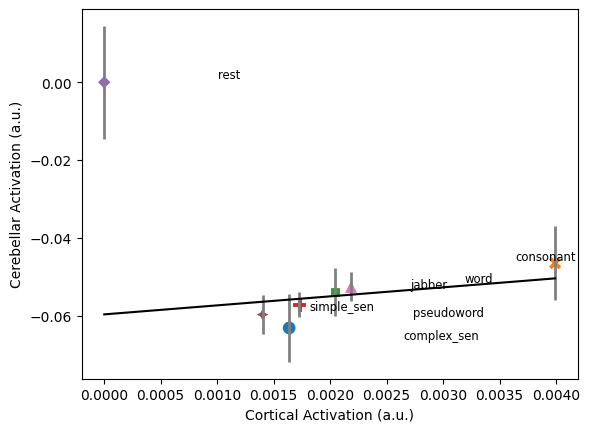

In [16]:
df_path = os.path.join(langdir, 'IBC/connectivity/', "ROI_MDTB10_conn.tsv")
df = pd.read_csv(df_path, sep="\t")
df1= df_clean(dataframe= df)

plotting.make_scatterplot(df1,split='cond_name', markers= True, labels= label_dict)

In [17]:
# need to pass 
print(AnovaRM(data=df1[df1.cond_name!='rest'], depvar='res',
              subject='sn', within=['cond_name'], aggregate_func = np.mean).fit())

                 Anova
          F Value Num DF  Den DF Pr > F
---------------------------------------
cond_name  0.8619 5.0000 55.0000 0.5126



# Language (connectivity: S1-S4) - MD (connectivity: D1-D4) SHIFT ANALYSIS

/home/ROBARTS/barafat/Documents/GitHub/selective_recruitment/scripts/script_roi_pairs_IBC.py:47: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1_condall = df1_noprob.groupby(['sn', 'cond_name']).mean()
/home/ROBARTS/barafat/Documents/GitHub/selective_recruitment/scripts/script_roi_pairs_IBC.py:59: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2_condall = df1_noprob.groupby(['sn', 'cond_name']).mean()


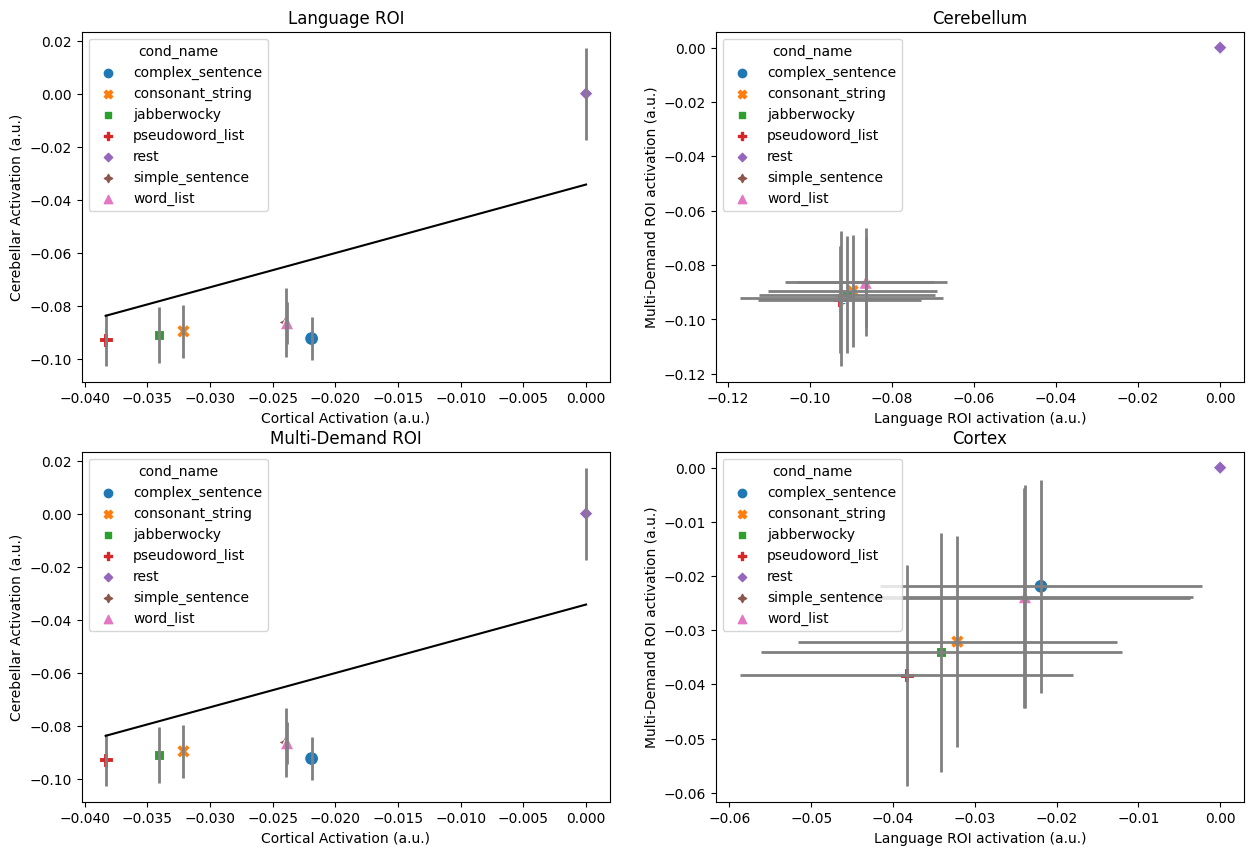

In [4]:
summary_1, summary_2= rp.get_summary_pair(dataset='IBC',ses_id = 'ses-rsvplanguage', type= 'CondHalf', roi_1='language(S1-S4)_NettekovenSym68c32',roi_2='md(D1-D4)_NettekovenSym68c32', add_rest= True)
figure =rp.plot_pair(dataframe_1=summary_1,dataframe_2=summary_2, markers= True)


# Language (nettekoven: S1L-S4L) - MD (nettekoven: D1-D4) SHIFT ANALYSIS

/tmp/ipykernel_12586/3610494310.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataframe_avaraged = dataframe.groupby(['sn', 'cond_name']).mean()
/tmp/ipykernel_12586/3610494310.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataframe_avaraged = dataframe.groupby(['sn', 'cond_name']).mean()


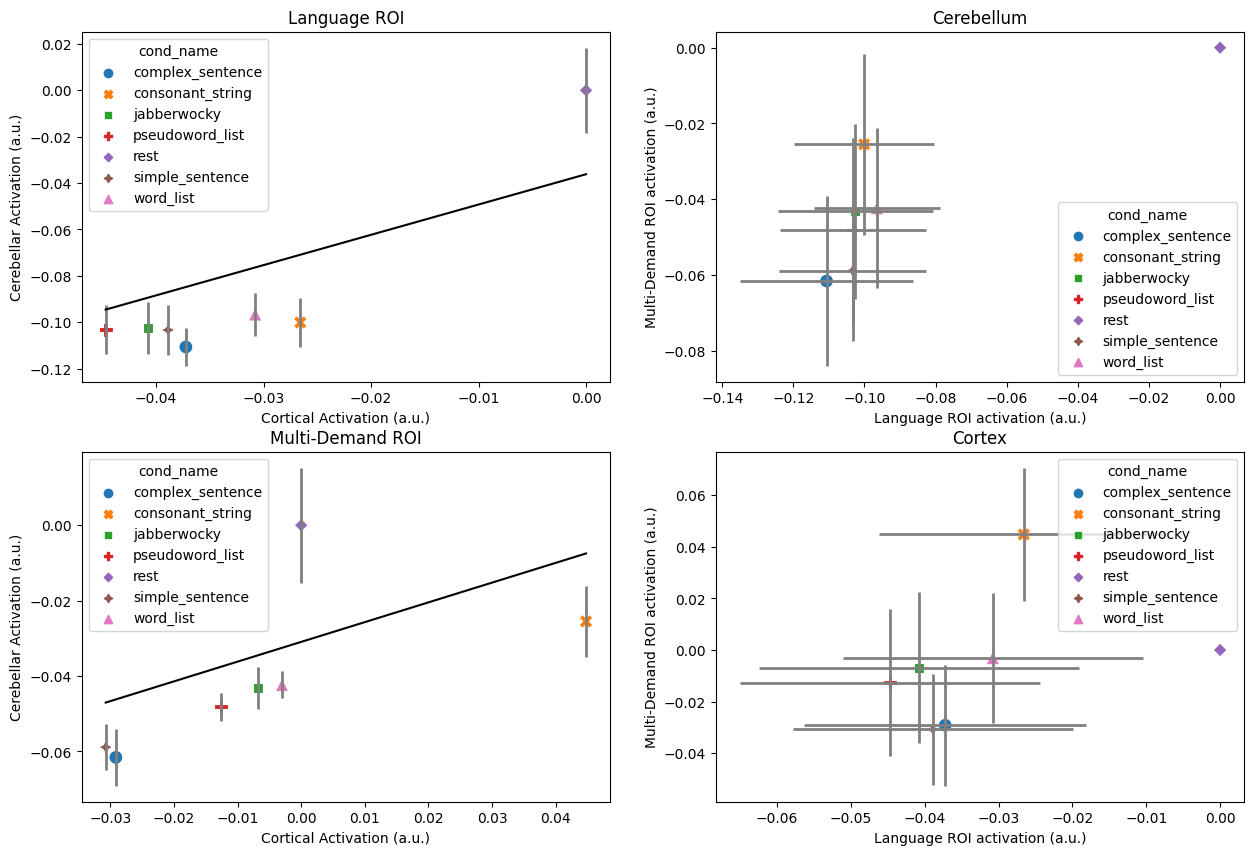

In [5]:
df1 = ra.get_summary(dataset= 'IBC', ses_id= 'ses-rsvplanguage',type='CondHalf', add_rest= True,
                            cerebellum_roi=f'tpl-SUIT/atl-language(S1L-S4L)_NettekovenSym68c32_space-SUIT', cortex_roi= f'tpl-fs32k/language(S1L-S4L)_NettekovenSym68c32.32k')
df1 = df1[df1['cond_name'] != 'probe']

df1= df_clean(dataframe= df1)

summary_1 = ra.run_regress(df = df1, fit_intercept= True)

df2 = ra.get_summary(dataset= 'IBC', ses_id= 'ses-rsvplanguage',type='CondHalf', add_rest= True,
                            cerebellum_roi=f'tpl-SUIT/atl-md(D1-D4)_NettekovenSym68c32_space-SUIT', cortex_roi= f'tpl-fs32k/md(D1-D4)_NettekovenSym68c32.32k')
df2 = df2[df2['cond_name'] != 'probe']

df2= df_clean(dataframe= df2)

summary_2 = ra.run_regress(df = df2, fit_intercept= True)

figure =rp.plot_pair(dataframe_1=summary_1,dataframe_2=summary_2, markers= True)




# Language (nettekoven: S1R-S4R) - MD (nettekoven: D1-D4) SHIFT ANALYSIS

/tmp/ipykernel_12586/3610494310.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataframe_avaraged = dataframe.groupby(['sn', 'cond_name']).mean()
/tmp/ipykernel_12586/3610494310.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataframe_avaraged = dataframe.groupby(['sn', 'cond_name']).mean()


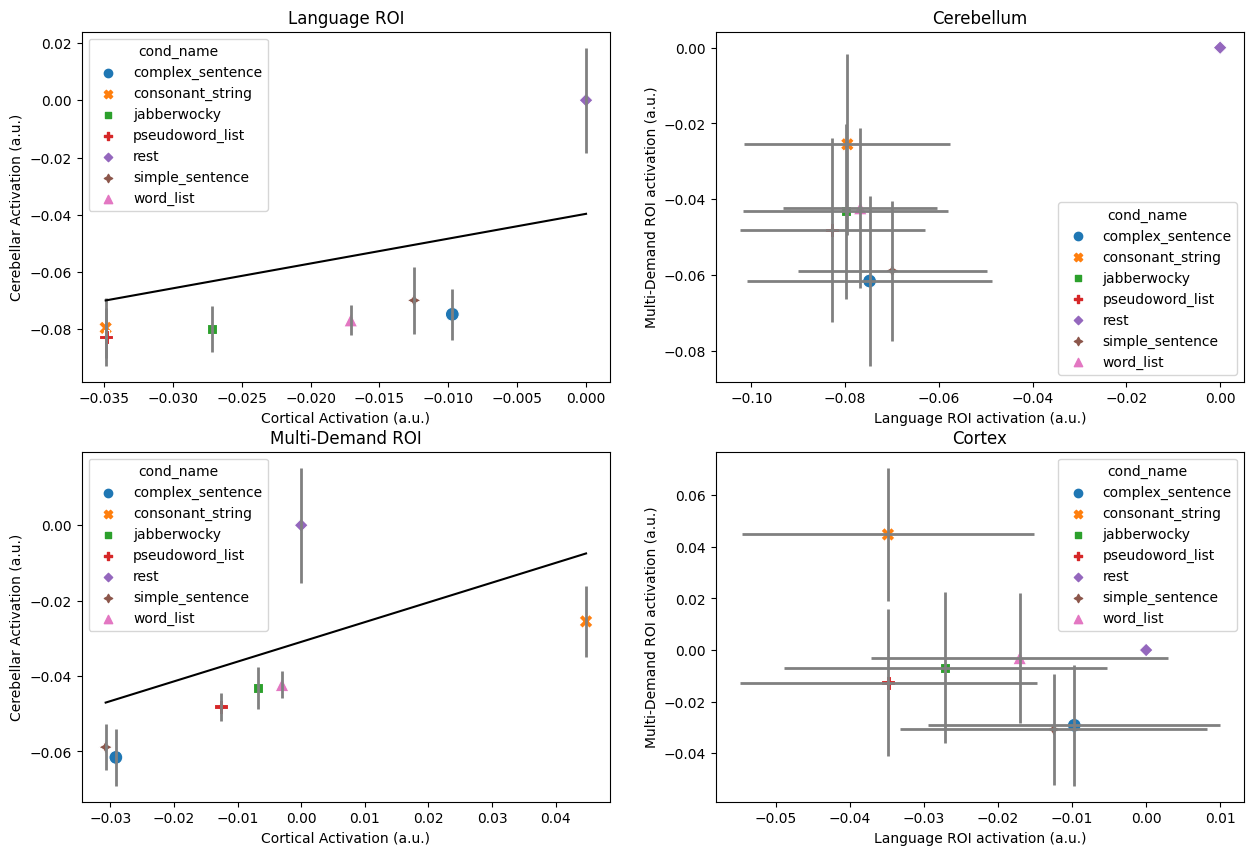

In [6]:
df1 = ra.get_summary(dataset= 'IBC', ses_id= 'ses-rsvplanguage',type='CondHalf', add_rest= True,
                            cerebellum_roi=f'tpl-SUIT/atl-language(S1R-S4R)_NettekovenSym68c32_space-SUIT', cortex_roi= f'tpl-fs32k/language(S1R-S4R)_NettekovenSym68c32.32k')
df1 = df1[df1['cond_name'] != 'probe']

df1= df_clean(dataframe= df1)

summary_1 = ra.run_regress(df = df1, fit_intercept= True)

df2 = ra.get_summary(dataset= 'IBC', ses_id= 'ses-rsvplanguage',type='CondHalf', add_rest= True,
                            cerebellum_roi=f'tpl-SUIT/atl-md(D1-D4)_NettekovenSym68c32_space-SUIT', cortex_roi= f'tpl-fs32k/md(D1-D4)_NettekovenSym68c32.32k')
df2 = df2[df2['cond_name'] != 'probe']

df2= df_clean(dataframe= df2)

summary_2 = ra.run_regress(df = df2, fit_intercept= True)

figure =rp.plot_pair(dataframe_1=summary_1,dataframe_2=summary_2, markers= True)
